In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-mobile-phone-reviews-dataset/SRPtest.csv
/kaggle/input/amazon-mobile-phone-reviews-dataset/SRPtrain.csv


# Star Rating prediction (Part-2):

**In this notebook, We will be doing feature vector generation for unigrams, bigrams, trigrams.**

**Link to Part-1: https://www.kaggle.com/rajatagg/starratingprediction-part-1**

# Loading the dataset

**We will use the preprocessed training data from [Part-1](https://www.kaggle.com/rajatagg/starratingprediction-part-1) to avoid preprocessing the [dataset](https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones) used in Part-1**

In [2]:
X_train_df = pd.read_csv('/kaggle/input/amazon-mobile-phone-reviews-dataset/SRPtrain.csv')

In [3]:
X_train_df.head()

,Reviews,Rating
0,nice practical basic but not cheap very resist...,4
1,grabbed function samsung note took off new hei...,5
2,day love bought neon orange people love color ...,5
3,person trash sent empty box without equipment ...,1
4,wanted good promising but kept turning off res...,1


**No need to check for NA/NULL values, We have already done that in [Part-1](https://www.kaggle.com/rajatagg/starratingprediction-part-1/notebook)**

In [4]:
#  is a python script containing functions used in preprocessing
from preprocessing_text import *

/kaggle/input/amazon-mobile-phone-reviews-dataset/SRPtest.csv
/kaggle/input/amazon-mobile-phone-reviews-dataset/SRPtrain.csv


In [5]:
X_train_df['review_length'] = np.array(X_train_df['Reviews'].apply(getReviewLength))
X_train_df['word_count'] = np.array(X_train_df['Reviews'].apply(getWordCount))

In [6]:
X_train_df.head()

,Reviews,Rating,review_length,word_count
0,nice practical basic but not cheap very resist...,4,66,13
1,grabbed function samsung note took off new hei...,5,144,29
2,day love bought neon orange people love color ...,5,59,12
3,person trash sent empty box without equipment ...,1,47,8
4,wanted good promising but kept turning off res...,1,122,22


In [7]:
#shape of the train dataset
X_train_df.shape

(250687, 4)

In [8]:
#importing libararies for visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


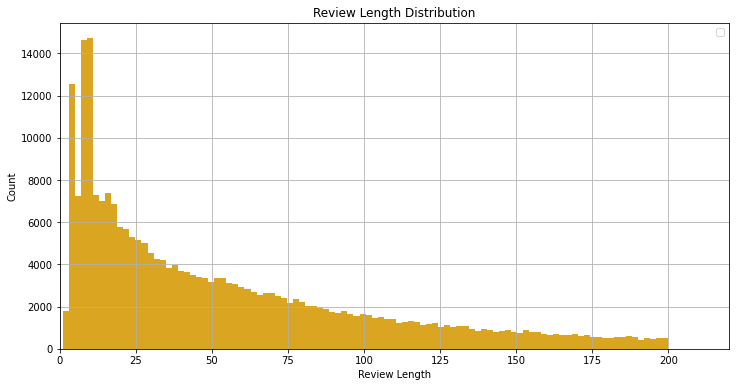

In [9]:
#plotting the histogram of review lengths

plt.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(X_train_df['review_length'], facecolor='goldenrod', alpha=1, bins=bins)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xlim(0,220)
plt.grid(True)
plt.show()

**Feature vector generation taking unigrams, bigrams, trigrams into account for different review lengths.
We will be computing train accuracy for now to see which review length is optimum.**

> Importing the required library

In [10]:
#Using sk-learn implementation for tf-idf vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# 1.1 Review.length < 75 with Unigrams:

In the previous version, I started with review.length < 200 but on running the notebook after sometime, the whole program resulted in memory overflow. So, starting with review.length < 75 this time.

In [11]:
#review.length < 75
index_names = X_train_df[X_train_df['review_length'] >= 75].index
X_train_df.drop(index_names, inplace = True)

> **fit_transform()** :Learn vocabulary and idf. The input is an iterable which can be string objects and returns Tf-idf-weighted document-term matrix.

In [12]:
# applying fit_transform to generate document term matrix

vectorizer_uni75 = TfidfVectorizer(ngram_range=(1,1))
vectorized_uni75 = vectorizer_uni75.fit_transform(X_train_df['Reviews'])
fvector_uni75 = vectorized_uni75.toarray()

> below shown is the matrix in which each row represents a feature vector corresponding to a review.

In [13]:
fvector_uni75

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
# looking like everthing is 0, but it is sparse representation

fvector_uni75.sum(axis=0)

array([ 3.17065988, 35.88135924,  4.18048975, ...,  0.40824829,
        0.42309893,  0.31485038])

In [15]:
print("The length of the feature vector is :",fvector_uni75.shape[1])

The length of the feature vector is : 14789


In [16]:
vectorizer_uni75.get_feature_names()[100:130]

['according',
 'accordingly',
 'account',
 'accounted',
 'accsesories',
 'accsessiores',
 'acct',
 'acctivated',
 'accts',
 'accuracy',
 'accurate',
 'accurately',
 'accurrate',
 'accustom',
 'accustomed',
 'acdc',
 'ace',
 'acelera',
 'acepar',
 'aceptable',
 'acer',
 'acerca',
 'acertada',
 'acesorios',
 'acessoires',
 'acessories',
 'acewin',
 'ache',
 'achieve',
 'acid']

Now, that we have generated the feature vector let's see how well it works on training data using different algorithms(**Multinomial Naive Bayes Algorithm** for this notebook)

In [17]:
from sklearn.naive_bayes import MultinomialNB
model_uni75 = MultinomialNB()

# Fit Naive Bayes classifier according to X, y.
model_uni75.fit(fvector_uni75,X_train_df['Rating'])

MultinomialNB()

In [18]:
# Perform classification on an array of test vectors.
y_pred = model_uni75.predict(fvector_uni75) 

> Importing the functions to obtain the performance metrics

In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [20]:
print("Classfication Report for (Unigrams, 75)\n\n")
target_names = ['1', '2', '3', '4', '5']
classification_score = classification_report(X_train_df['Rating'], y_pred, target_names=target_names)
print(classification_score)

Classfication Report for (Unigrams, 75)


              precision    recall  f1-score   support

           1       0.69      0.82      0.75     25821
           2       0.94      0.06      0.12      7608
           3       0.83      0.15      0.25     11148
           4       0.64      0.18      0.28     24771
           5       0.78      0.98      0.87    112837

    accuracy                           0.76    182185
   macro avg       0.78      0.44      0.45    182185
weighted avg       0.76      0.76      0.70    182185



# 1.2.1 Review.length < 50 with Unigrams:

In [21]:
# review.length < 50 i.e 
index_names = X_train_df[X_train_df['review_length'] > 50].index
X_train_df.drop(index_names, inplace = True)

In [22]:
# applying fit_transform to generate document term matrix

vectorizer_uni50 = TfidfVectorizer(ngram_range=(1,1))
vectorized_uni50 = vectorizer_uni50.fit_transform(X_train_df['Reviews'])
fvector_uni50 = vectorized_uni50.toarray()

In [23]:
print("The length of the feature vector is :",fvector_uni50.shape[1])

The length of the feature vector is : 10005


In [24]:
model_uni50 = MultinomialNB()
model_uni50.fit(fvector_uni50,X_train_df['Rating'])

MultinomialNB()

In [25]:
y_pred = model_uni50.predict(fvector_uni50) 

In [26]:
print("Classfication Report for (Unigrams, 50) \n\n")
classification_score = classification_report(X_train_df['Rating'], y_pred, target_names=target_names)
print(classification_report)

Classfication Report for (Unigrams, 50) 


<function classification_report at 0x7f141a51dd40>


# 1.2.2 Review.length < 50 with Bi-grams:

In [27]:
# applying fit_transform to generate document term matrix

vectorizer_bi50 = TfidfVectorizer(ngram_range=(2,2))
vectorized_bi50 = vectorizer_bi50.fit_transform(X_train_df['Reviews'])
fvector_bi50 = vectorized_bi50.toarray()

In [28]:
print("The length of the feature vector is :", fvector_bi50.shape[1])

The length of the feature vector is : 82792


In [29]:
vectorizer_bi50.get_feature_names()[100:130]

['able updated',
 'able upgrad',
 'able upgrade',
 'able use',
 'able used',
 'able utilize',
 'able web',
 'able work',
 'able yo',
 'ableable update',
 'abou year',
 'abouat selling',
 'abroad but',
 'abroad great',
 'abroad no',
 'abroad postage',
 'abroad totally',
 'abroad work',
 'abroad worked',
 'absolute bargain',
 'absolute best',
 'absolute disappointment',
 'absolute garbage',
 'absolute love',
 'absolute pleasure',
 'absolute worst',
 'absolutely amazing',
 'absolutely awesome',
 'absolutely awful',
 'absolutely beautiful']

In [30]:
model_bi50 = MultinomialNB()
model_bi50.fit(fvector_bi50,X_train_df['Rating'])

MultinomialNB()

In [31]:
y = model_bi50.predict(fvector_bi50) 

In [32]:
print("Classfication Report for (Bigrams, 50) \n\n")
classification_score = classification_report(X_train_df['Rating'], y_pred, target_names=target_names)
print(classification_score)

Classfication Report for (Bigrams, 50) 


              precision    recall  f1-score   support

           1       0.70      0.84      0.76     18521
           2       0.94      0.10      0.17      5340
           3       0.81      0.17      0.28      8110
           4       0.64      0.16      0.26     19220
           5       0.80      0.99      0.88     96844

    accuracy                           0.78    148035
   macro avg       0.78      0.45      0.47    148035
weighted avg       0.77      0.78      0.73    148035



# 1.3.1 Review.length < 25 with Unigrams:

In [33]:
# review.length < 25 i.e 
index_names = X_train_df[X_train_df['review_length'] > 25].index
X_train_df.drop(index_names, inplace = True)

In [34]:
# applying fit_transform to generate document term matrix

vectorizer_uni25 = TfidfVectorizer(ngram_range=(1,1))
vectorized_uni25 = vectorizer_uni25.fit_transform(X_train_df['Reviews'])
fvector_uni25 = vectorized_uni25.toarray()

In [35]:
print("The length of the feature vector is :",fvector_uni25.shape[1])

The length of the feature vector is : 5056


In [36]:
model_uni25 = MultinomialNB()
model_uni25.fit(fvector_uni25,X_train_df['Rating'])

MultinomialNB()

In [37]:
y_pred = model_uni25.predict(fvector_uni25) 

In [38]:
classification_score = classification_report(X_train_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Unigrams, 25) \n\n")

              precision    recall  f1-score   support

           1       0.72      0.83      0.77      9211
           2       0.86      0.11      0.20      2594
           3       0.75      0.19      0.31      4270
           4       0.68      0.12      0.20     12275
           5       0.82      0.99      0.90     70450

    accuracy                           0.81     98800
   macro avg       0.77      0.45      0.48     98800
weighted avg       0.80      0.81      0.76     98800

Classfication Report for (Unigrams, 25) 




# 1.3.2 Review.length < 25 with Bigrams:

In [39]:
# applying fit_transform to generate document term matrix

vectorizer_bi25 = TfidfVectorizer(ngram_range=(2,2))
vectorized_bi25 = vectorizer_bi25.fit_transform(X_train_df['Reviews'])
fvector_bi25 = vectorized_bi25.toarray()

In [40]:
print("The length of the feature vector is :",fvector_bi25.shape[1])

The length of the feature vector is : 23024


In [41]:
model_bi25 = MultinomialNB()
model_bi25.fit(fvector_bi25,X_train_df['Rating'])

MultinomialNB()

In [42]:
y_pred = model_bi25.predict(fvector_bi25) 

In [43]:
classification_score = classification_report(X_train_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Bigrams, 25) \n\n")

              precision    recall  f1-score   support

           1       0.84      0.77      0.81      9211
           2       1.00      0.22      0.35      2594
           3       0.98      0.24      0.39      4270
           4       0.86      0.22      0.35     12275
           5       0.82      1.00      0.90     70450

    accuracy                           0.83     98800
   macro avg       0.90      0.49      0.56     98800
weighted avg       0.84      0.83      0.79     98800

Classfication Report for (Bigrams, 25) 




# 1.3.3 Review.length < 25 with Trigrams:

In [44]:
# applying fit_transform to generate document term matrix

vectorizer_tri25 = TfidfVectorizer(ngram_range=(3,3))
vectorized_tri25 = vectorizer_tri25.fit_transform(X_train_df['Reviews'])
fvector_tri25 = vectorized_tri25.toarray()

In [45]:
print("The length of the feature vector is :",fvector_tri25.shape[1])

The length of the feature vector is : 24043


In [46]:
vectorizer_tri25.get_feature_names()[100:130]

['advertised well done',
 'advertised work amazing',
 'advertised work fine',
 'advertised work great',
 'advertised work perfectly',
 'advise not buy',
 'af mode not',
 'affordable awesome blu',
 'affordable low budget',
 'affordable price very',
 'affordable yet very',
 'africa work great',
 'afriend say wanted',
 'afte week flashed',
 'afternoon good job',
 'afternoon good product',
 'ago far good',
 'ago no problem',
 'ago not problem',
 'agora comprar plus',
 'agradecida por la',
 'ahora super bien',
 'al ajtyyjyj jy',
 'al dia responsables',
 'al ready le',
 'al very good',
 'al ximo encanta',
 'ale version not',
 'alittle slow but',
 'allit one use']

In [47]:
model_tri25 = MultinomialNB()
model_tri25.fit(fvector_tri25,X_train_df['Rating'])

MultinomialNB()

In [48]:
y_pred = model_tri25.predict(fvector_tri25) 

In [49]:
classification_score = classification_report(X_train_df['Rating'], y_pred, target_names=target_names)
print(classification_score)
print("Classfication Report for (Trigrams, 25) \n\n")

              precision    recall  f1-score   support

           1       0.96      0.38      0.55      9211
           2       1.00      0.11      0.19      2594
           3       1.00      0.12      0.22      4270
           4       0.97      0.20      0.33     12275
           5       0.77      1.00      0.87     70450

    accuracy                           0.78     98800
   macro avg       0.94      0.36      0.43     98800
weighted avg       0.83      0.78      0.73     98800

Classfication Report for (Trigrams, 25) 




# **Classification Scores(Training Data)**

        
   

   <table>
  <tr>
    <th>(Ngram, Review Length(less than))</th>
    <th>Accuracy</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1-Score</th>
  </tr>
  <tr>
    <td>Unigram, 200(from version 2)</td>    
    <td>0.73</td>
    <td>0.74</td>
    <td>0.73</td>
    <td>0.65</td>
  </tr>
    <tr>
    <td>Unigram, 75</td>    
    <td>0.76</td>
    <td>0.76</td>
    <td>0.76</td>
    <td>0.70</td>
  </tr>
  <tr>
    <td>Unigram, 50</td>   
      <td>0.78</td>
    <td>0.77</td>
    <td>0.78</td>
      <td>0.73</td>
  </tr>
  <tr>
    <td>Bigram, 50</td> 
   <td>0.83</td>
    <td>0.85</td>
    <td>0.83</td>
    <td>0.80</td>
  </tr>
  <tr>
    <td>Unigram, 25</td>
    <td>0.81</td>
    <td>0.80</td>
    <td>0.81</td>
    <td>0.76</td>
  </tr>
  <tr>
    <td>Bigram, 25</td>
    <td>0.83</td>
    <td>0.84</td>
    <td>0.83</td>
    <td>0.79</td>
  </tr>
  <tr>
    <td>Trigram, 25</td> 
    <td>0.78</td>
    <td>0.83</td>
    <td>0.78</td>
    <td>0.73</td>
  </tr>
</table>

> 

**Conclusion**: 
* We have to implement spelling correction, highly redundant features are generated.

* Based on the above classification report
    * For Review.length = 25, precision and recall are highest. 
    * For Review.length = 50, Bi-grams have the highest precision and recall.

In [50]:
# function to get the star rating
# input : vectorizer, model and review_text
# output: predicted star rating

def getStarRating(vectorizer, model, review, model_name = " "):
    #review = input("Enter your review to get the star rating: \n")
    preprocessed_review = preprocess_review(review)
    features = vectorizer.transform([preprocessed_review])
    feature_vector = features.toarray()
    predicted_class = model.predict(feature_vector)
    print("\nPredicted Star Rating (" + model_name + "), review='" + review + "' is:", predicted_class)
    return predicted_class

# **Let's do a mannual check on our models of (Unigram,50), (Bigram,50) & (Trigram, 25)**

In [51]:
test_review = "display is not great, but good at this price point"

_ = getStarRating(vectorizer_uni50, model_uni50, test_review,"unigram,50")
_ = getStarRating(vectorizer_bi50, model_bi50, test_review, "bigram,50")
_ = getStarRating(vectorizer_tri25, model_tri25 ,test_review, "trigram, 25")


Predicted Star Rating (unigram,50), review='display is not great, but good at this price point' is: [5]

Predicted Star Rating (bigram,50), review='display is not great, but good at this price point' is: [4]

Predicted Star Rating (trigram, 25), review='display is not great, but good at this price point' is: [5]


In [52]:
test_review = "Amazing product, loved it"

_ = getStarRating(vectorizer_uni50, model_uni50, test_review,"unigram,50")
_ = getStarRating(vectorizer_bi50, model_bi50, test_review, "bigram,50")
_ = getStarRating(vectorizer_tri25, model_tri25 ,test_review, "trigram, 25")


Predicted Star Rating (unigram,50), review='Amazing product, loved it' is: [5]

Predicted Star Rating (bigram,50), review='Amazing product, loved it' is: [5]

Predicted Star Rating (trigram, 25), review='Amazing product, loved it' is: [5]


In [53]:
test_review = "worst performance except the sound quality"

_ = getStarRating(vectorizer_uni50, model_uni50, test_review,"unigram,50")
_ = getStarRating(vectorizer_bi50, model_bi50, test_review, "bigram,50")
_ = getStarRating(vectorizer_tri25, model_tri25 ,test_review, "trigram, 25")


Predicted Star Rating (unigram,50), review='worst performance except the sound quality' is: [1]

Predicted Star Rating (bigram,50), review='worst performance except the sound quality' is: [5]

Predicted Star Rating (trigram, 25), review='worst performance except the sound quality' is: [5]


In [54]:
test_review = "overall its great, but its gets heat up"

_ = getStarRating(vectorizer_uni50, model_uni50, test_review,"unigram,50")
_ = getStarRating(vectorizer_bi50, model_bi50, test_review, "bigram,50")
_ = getStarRating(vectorizer_tri25, model_tri25 ,test_review, "trigram, 25")


Predicted Star Rating (unigram,50), review='overall its great, but its gets heat up' is: [4]

Predicted Star Rating (bigram,50), review='overall its great, but its gets heat up' is: [5]

Predicted Star Rating (trigram, 25), review='overall its great, but its gets heat up' is: [5]


# **Let's save the vectorizers and models since the dataset is large and that too for different versions of models. It is taking up a lot of space resulting in overflow if I am doing testing in this notebook also. So, I will use the saved models and vectorizers and do the testing in other notebook.**

> **Importing the required libraries**

In [55]:
import joblib

> **make a directory models to save vectorizers and models**

In [56]:
os.mkdir('/kaggle/working/models/')

> **saving all the vectorizers and models**

In [57]:
_path =  "/kaggle/working/models/"
_path = "/kaggle/working/models/"

joblib.dump(model_uni75, _path+"model_uni75.sav")
joblib.dump(vectorizer_uni75, _path+"vectorizer_uni75.sav")

joblib.dump(model_uni50, _path+"model_uni50.sav")
joblib.dump(vectorizer_uni50, _path+"vectorizer_uni50.sav")

joblib.dump(model_uni25, _path+"model_uni25.sav")
joblib.dump(vectorizer_uni25, _path+"vectorizer_uni25.sav")

joblib.dump(model_bi50, _path+"model_bi50.sav")
joblib.dump(vectorizer_bi50, _path+"vectorizer_bi50.sav")

joblib.dump(model_bi25, _path+"model_bi25.sav")
joblib.dump(vectorizer_bi25, _path+"vectorizer_bi25.sav")

joblib.dump(model_tri25, _path+"model_tri25.sav")
joblib.dump(vectorizer_tri25, _path+"vectorizer_tri25.sav")

['/kaggle/working/models/vectorizer_tri25.sav']

> **to remove files and directories**

<pre>
# remove directories
import shutil
shutil.rmtree("/kaggle/working/models")

# remove files
import os
os.remove("path")
</pre>

# **We have saved the vectorizers and models to test them in another notebook**